## Import library files

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re #Regular expressions (regex) module. Used for pattern matching, searching, and manipulating text.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Downloading necessary resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jyothy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jyothy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jyothy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jyothy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Load data

In [15]:
df = pd.read_csv('data_100row.csv')
print(df.head())
print(df.shape)


  On 27 Aug 2023, at 01:54 AM, a bus collided with a a cow at NH85 near Idukki. The rider suffered a multiple injuries and is in critical condition. The cause of the accident was determined to be traffic rule violation.
0  On 02 Oct 2023, at 05:53 AM, a Jeep collided w...                                                                                                                                                                       
1  On 03 Nov 2023, at 06:59 AM, a truck collided ...                                                                                                                                                                       
2  On 04 Feb 2024, at 12:33 AM, a auto-rickshaw c...                                                                                                                                                                       
3  On 21 Mar 2023, at 09:02 PM, a auto-rickshaw c...                                                                    

## Remove duplicates and missing values

In [16]:
# Rename the column properly
df.columns = ["Accident_Report"]

# Remove duplicate and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Display cleaned data
print(df.shape)

(99, 1)


# NLP Text cleaning

In [17]:
# Initialize NLP tools
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase to ensure uniformity
    text = re.sub(r'\d+', '', text)  # Remove numbers  (\d+ means one or more digits)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation (^:Negation \w:letters,numbers,underscore \s:spaces,tabs,newline |matches everything except \w and \s)
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)
# Apply preprocessing
df["Cleaned_Report"] = df["Accident_Report"].apply(preprocess_text)
# Display processed data
print(df.head())

# #Save cleaned report as csv file
# df.to_csv("cleaned_report.csv", index=False)


                                     Accident_Report  \
0  On 02 Oct 2023, at 05:53 AM, a Jeep collided w...   
1  On 03 Nov 2023, at 06:59 AM, a truck collided ...   
2  On 04 Feb 2024, at 12:33 AM, a auto-rickshaw c...   
3  On 21 Mar 2023, at 09:02 PM, a auto-rickshaw c...   
4  On 03 Feb 2025, at 06:26 AM, a auto-rickshaw c...   

                                      Cleaned_Report  
0  oct jeep collided cow nh near thrissur rider w...  
1  nov truck collided stray dog nh near malappura...  
2  feb autorickshaw collided stray dog nh near ko...  
3  mar pm autorickshaw collided cow nh near palak...  
4  feb autorickshaw collided cow nh near kollam r...  


## Topic Modeling (LDA - Unsupervised Learning)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
dtm = vectorizer.fit_transform(df["Cleaned_Report"])

# Train LDA model with 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display top words per topic
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Top 10 words
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: minor, cow, cause, nh, determined, accident, near, suffered, collided, rider
Topic 2: fracture, accident, suffered, near, rider, collided, determined, nh, cause, condition
Topic 3: wearing, seatbelt, cause, nh, determined, collided, rider, near, accident, suffered
Topic 4: condition, rider, collided, suffered, near, accident, determined, nh, cause, injury
Topic 5: spot, dead, collided, rider, nh, suffered, near, cause, accident, determined


## Clustering Using KMeans

In [19]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on document-term matrix
num_clusters = 5  # Choose number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(dtm)

# Show some clustered accident reports
print(df[["Accident_Report", "Cluster"]].head(10))

                                     Accident_Report  Cluster
0  On 02 Oct 2023, at 05:53 AM, a Jeep collided w...        1
1  On 03 Nov 2023, at 06:59 AM, a truck collided ...        3
2  On 04 Feb 2024, at 12:33 AM, a auto-rickshaw c...        4
3  On 21 Mar 2023, at 09:02 PM, a auto-rickshaw c...        4
4  On 03 Feb 2025, at 06:26 AM, a auto-rickshaw c...        2
5  On 11 Jun 2023, at 08:31 PM, a bicycle collide...        1
6  On 01 Jul 2023, at 12:34 AM, a auto-rickshaw c...        1
7  On 28 Jan 2023, at 10:53 AM, a car collided wi...        3
8  On 28 Dec 2023, at 05:26 AM, a truck collided ...        1
9  On 11 May 2023, at 02:29 AM, a car collided wi...        0


## Visualizing Clusters Using PCA

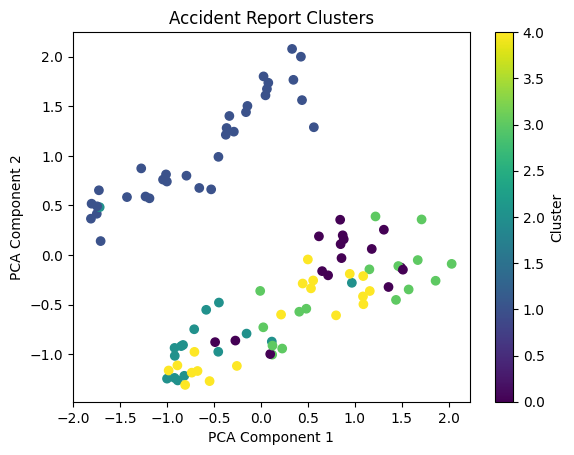

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(dtm.toarray())

# Plot clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df["Cluster"], cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Accident Report Clusters")
plt.colorbar(label="Cluster")
plt.show()

## Interpret the Clusters

In [21]:
for cluster_num in range(5):  # Adjust based on your number of clusters
    print(f"\nCluster {cluster_num}:")
    print(df[df["Cluster"] == cluster_num]["Accident_Report"].head(5))


Cluster 0:
9     On 11 May 2023, at 02:29 AM, a car collided wi...
15    On 15 Jul 2024, at 11:49 AM, a Jeep collided w...
20    On 08 Oct 2023, at 01:05 PM, a Jeep collided w...
25    On 12 Aug 2023, at 03:54 AM, a truck collided ...
26    On 21 Mar 2024, at 09:08 AM, a car collided wi...
Name: Accident_Report, dtype: object

Cluster 1:
0     On 02 Oct 2023, at 05:53 AM, a Jeep collided w...
5     On 11 Jun 2023, at 08:31 PM, a bicycle collide...
6     On 01 Jul 2023, at 12:34 AM, a auto-rickshaw c...
8     On 28 Dec 2023, at 05:26 AM, a truck collided ...
12    On 01 May 2023, at 07:32 AM, a truck collided ...
Name: Accident_Report, dtype: object

Cluster 2:
4     On 03 Feb 2025, at 06:26 AM, a auto-rickshaw c...
10    On 31 Dec 2023, at 12:34 AM, a bicycle collide...
13    On 11 Jan 2024, at 07:09 AM, a Jeep collided w...
16    On 04 Sep 2024, at 08:34 AM, a bicycle collide...
17    On 26 Jan 2024, at 08:25 PM, a auto-rickshaw c...
Name: Accident_Report, dtype: object

Cluster 3:
1

## Fine-Tune the Model
- If topics seem too broad, increase n_components in LDA.
- If clusters overlap, adjust n_clusters in KMeans.

In [22]:
# Example: Increase topics from 5 to 7
lda = LatentDirichletAllocation(n_components=7, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

 ## Extract Key Insights

In [23]:
cluster_counts = df["Cluster"].value_counts()
print("Accident Distribution Across Clusters:\n", cluster_counts)

Accident Distribution Across Clusters:
 Cluster
1    32
4    19
3    16
2    16
0    16
Name: count, dtype: int64


## Generate a Report/Dashboard

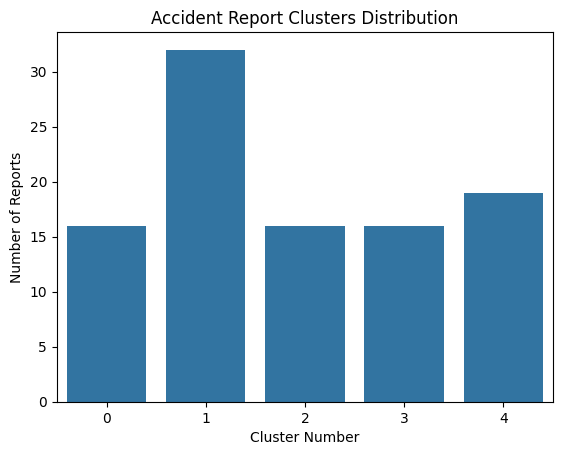

In [24]:
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel("Cluster Number")
plt.ylabel("Number of Reports")
plt.title("Accident Report Clusters Distribution")
plt.show()

## Deploy a Simple Clustering API (Optional)

In [25]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    report = request.json["text"]
    processed_report = preprocess_text(report)
    vectorized_report = vectorizer.transform([processed_report])
    cluster = kmeans.predict(vectorized_report)[0]
    return jsonify({"Predicted Cluster": int(cluster)})

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

d:\ICT Academy\Internship\AI_powered_accident_cause_identification\.venv\Lib\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
